In [53]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

from src.code.simulation.galton_watson import GaltonWatson
from src.code.simulation.utils import plot_zn_distribution, test_loi_exponentielle
from src.config.config import seed
from src.utils.utils import init_notebook

In [54]:
init_notebook(seed)

# Simulation Galton-Watson

## Loi de Poisson

### λ = 1

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Poisson}}(1)$.

In [55]:
poisson_1 = stats.poisson(1)

In [56]:
gp1 = GaltonWatson(poisson_1)
gp1

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [57]:
nb_survivants = gp1.simule(20)

In [58]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 0 survivants au bout de 10 époques.


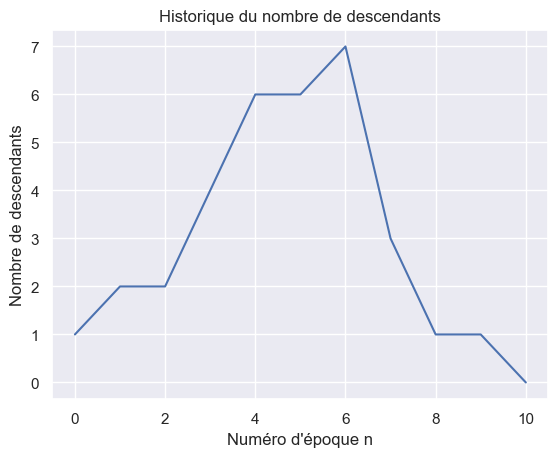

In [59]:
gp1.plot_historique_descendants()

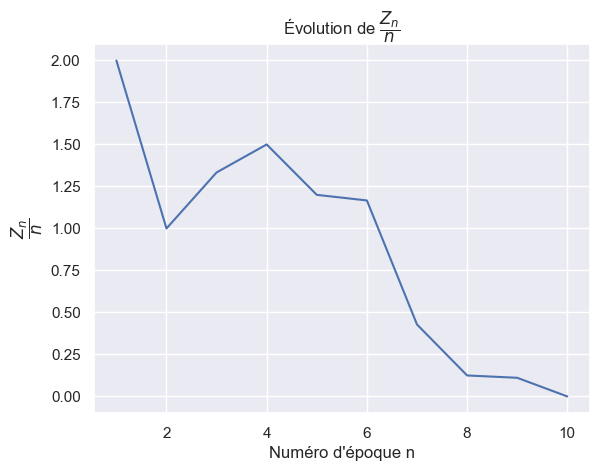

In [60]:
# noinspection JupyterPackage
gp1.plot_zn_sur_n()

#### Arbre de Galton-Watson

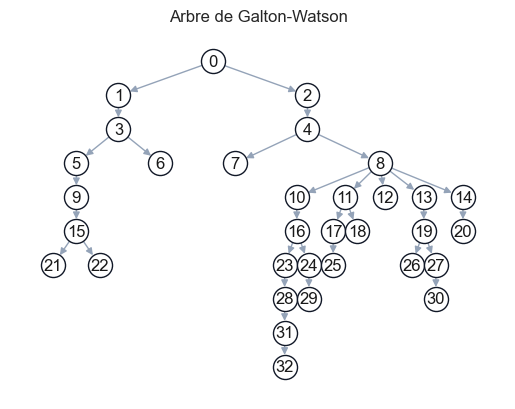

In [61]:
gp1.plot_arbre()

### λ = 2

In [62]:
poisson_2 = stats.poisson(2)

In [63]:
gp2 = GaltonWatson(poisson_2)
gp2

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 2.0
- époque n = 0
- nombre de survivants Z_n = 1

In [64]:
nb_survivants = gp2.simule(20)

In [65]:
print(f"Il reste {nb_survivants} survivants au bout de {gp2.n} époques.")

Il reste 680149 survivants au bout de 20 époques.


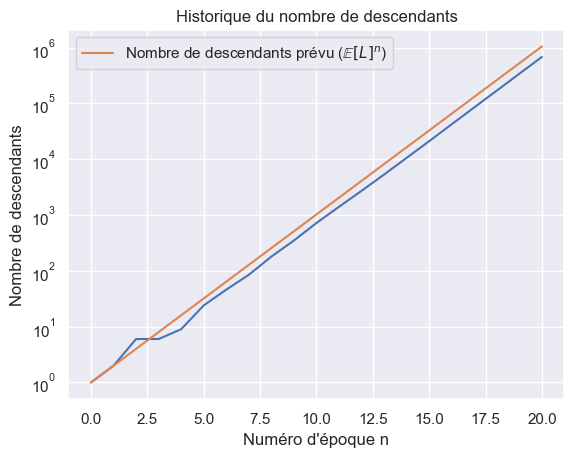

In [66]:
gp2.plot_historique_descendants(logscale=True, affiche_moyenne=True)

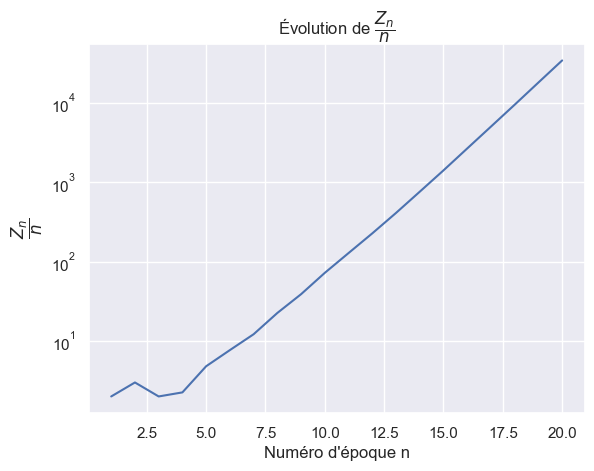

In [67]:
gp2.plot_zn_sur_n(logscale=True)

## Essais $Z_n / n$

In [68]:
nb_simulations = 10_000
nb_epoques = 100

In [69]:
simulations = gp1.lance_simulations(nb_simulations, nb_epoques)
simulations = np.array(simulations)

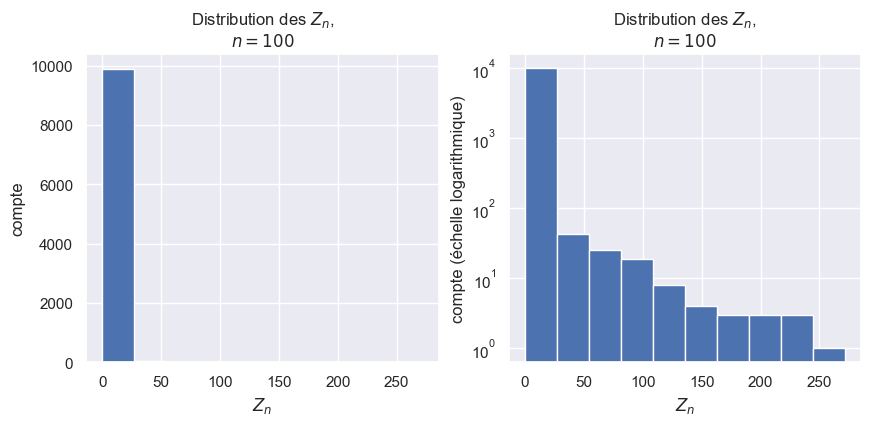

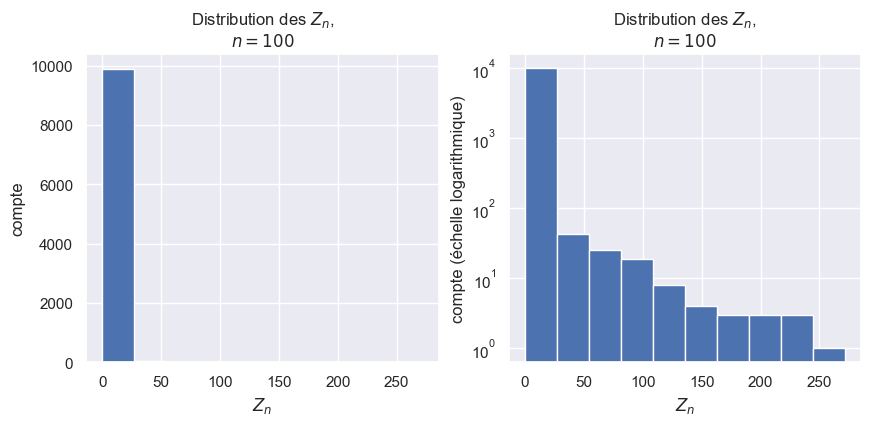

In [70]:
plot_zn_distribution(simulations, nb_epoques)

In [71]:
np.sum(simulations > 0)

191

191

In [72]:
zn_sup_zero = simulations[simulations > 0]

(array([83., 43., 26., 17.,  8.,  4.,  3.,  3.,  3.,  1.]),
 array([  1. ,  28.1,  55.2,  82.3, 109.4, 136.5, 163.6, 190.7, 217.8,
        244.9, 272. ]),
 <BarContainer object of 10 artists>)

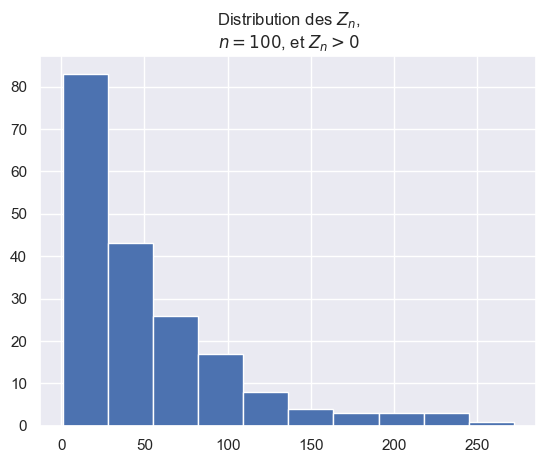

(array([83., 43., 26., 17.,  8.,  4.,  3.,  3.,  3.,  1.]),
 array([  1. ,  28.1,  55.2,  82.3, 109.4, 136.5, 163.6, 190.7, 217.8,
        244.9, 272. ]),
 <BarContainer object of 10 artists>)

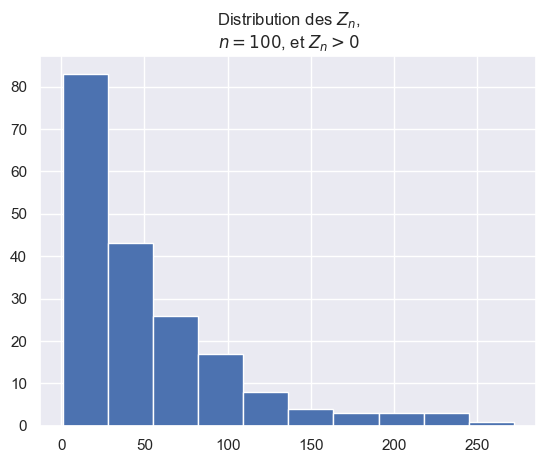

In [73]:
plt.title("Distribution des $Z_n$,\n$n = 100$, et $Z_n > 0$")
plt.hist(zn_sup_zero)

In [74]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 1.902959051509415
lambda_estime = 1.902959051509415


In [75]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [76]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

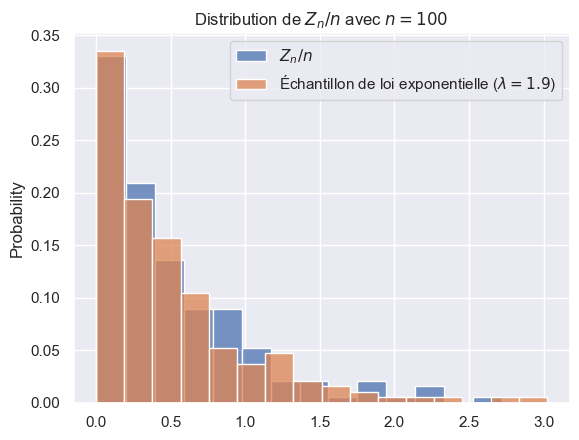

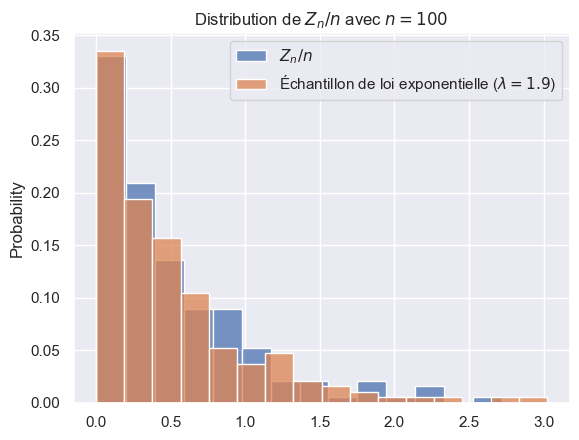

In [77]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability", label="$Z_n / n$")
sns.histplot(
    echantillon_expo,
    stat="probability",
    label=f"Échantillon de loi exponentielle ($\\lambda = {lambda_estime: 0.2}$)",
)

plt.legend()

In [78]:
test_loi_exponentielle(zn_sup_zero / nb_epoques)

statistique_ks = 0.057586680541798524
p_value = 0.531818713902256
Les données suivent une loi exponentielle.


0.531818713902256

statistique_ks = 0.057586680541798524
p_value = 0.531818713902256
Les données suivent une loi exponentielle.


0.531818713902256

## Loi uniforme sur {0, 1, 2}

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Uniforme}}(0, 2)$.

In [79]:
uniforme2 = stats.randint(0, 3)

In [80]:
gu2 = GaltonWatson(uniforme2)
gu2

Processus Galton-Watson
- loi de reproduction L : randint
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

Processus Galton-Watson
- loi de reproduction L : randint
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [81]:
nb_survivants = gu2.simule(100)

In [82]:
print(f"Il reste {nb_survivants} survivants au bout de {gu2.n} époques.")

Il reste 23 survivants au bout de 100 époques.
Il reste 23 survivants au bout de 100 époques.


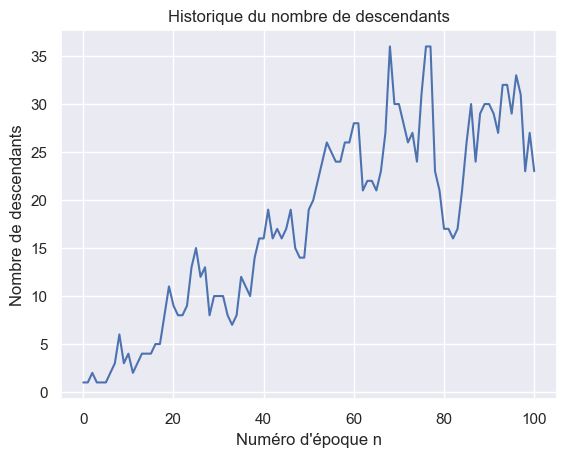

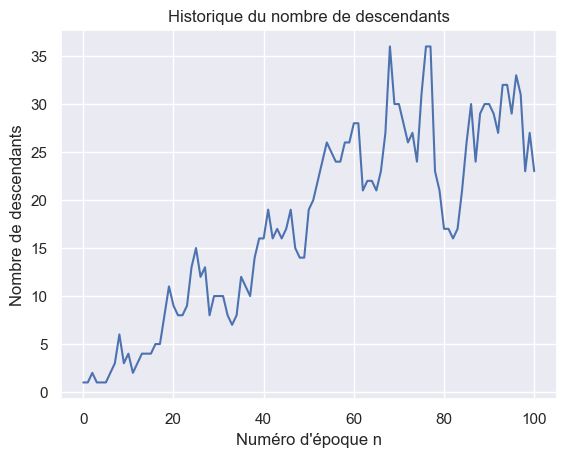

In [83]:
gu2.plot_historique_descendants()

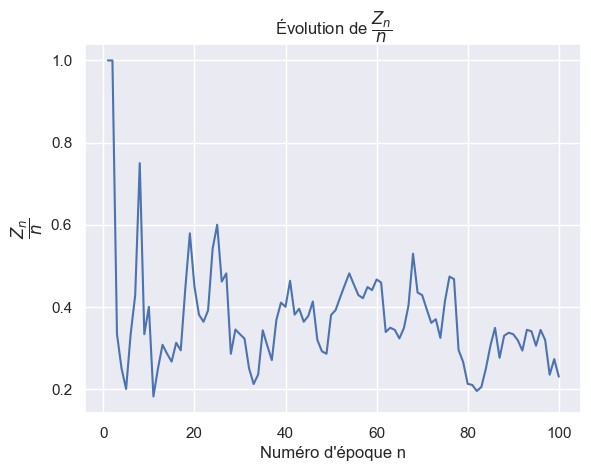

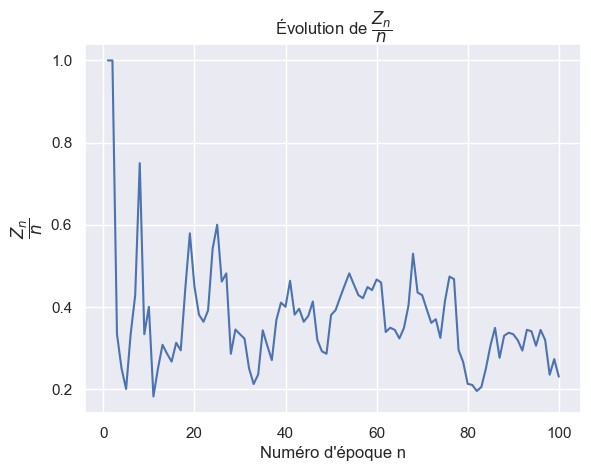

In [84]:
gu2.plot_zn_sur_n()

#### Arbre de Galton-Watson

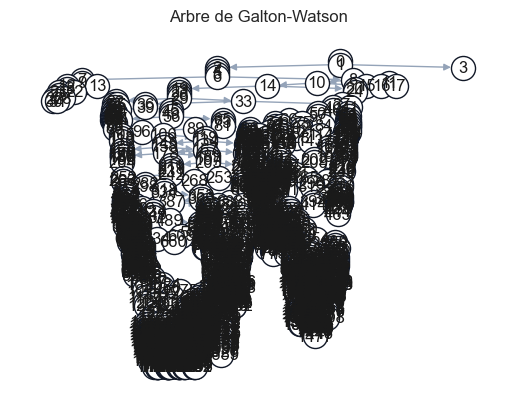

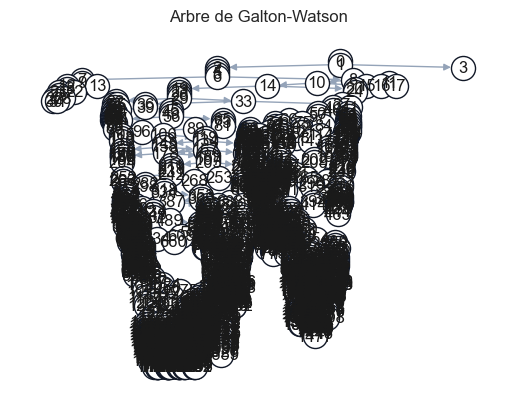

In [85]:
gu2.plot_arbre()

## Essais $Z_n / n$

In [86]:
nb_simulations = 10_000
nb_epoques = 100

simulations = gu2.lance_simulations(nb_simulations, nb_epoques)

In [87]:
simulations = np.array(simulations)

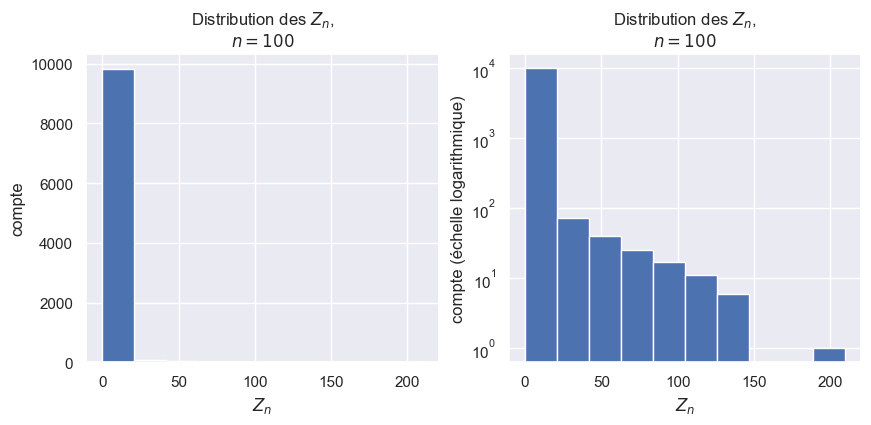

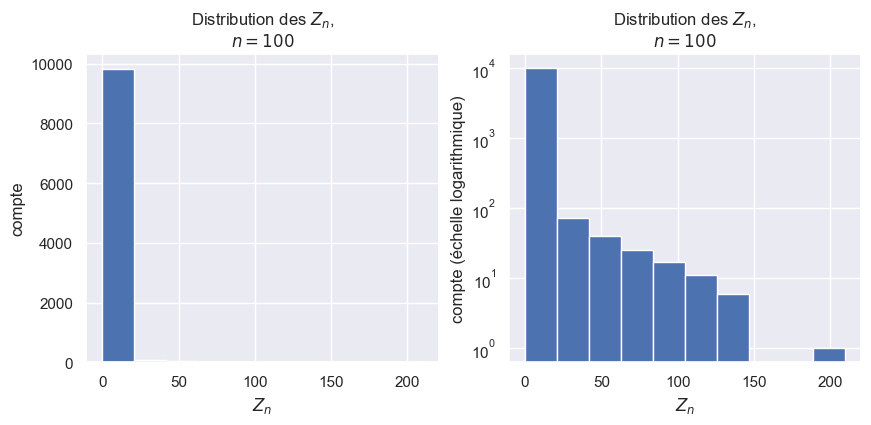

In [88]:
plot_zn_distribution(simulations, nb_epoques)

In [89]:
np.sum(simulations > 0)

295

295

In [90]:
zn_sup_zero = simulations[simulations > 0]

(array([125.,  73.,  39.,  25.,  17.,   9.,   6.,   0.,   0.,   1.]),
 array([  1. ,  21.9,  42.8,  63.7,  84.6, 105.5, 126.4, 147.3, 168.2,
        189.1, 210. ]),
 <BarContainer object of 10 artists>)

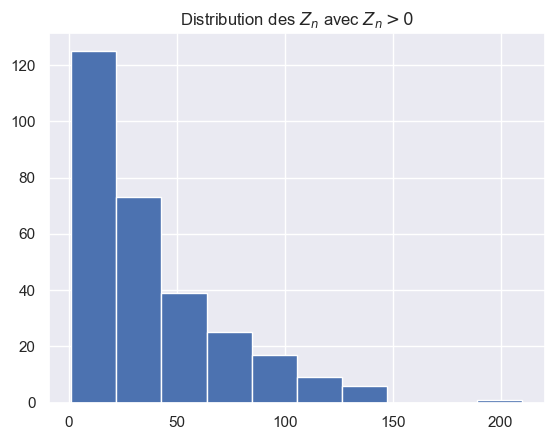

(array([125.,  73.,  39.,  25.,  17.,   9.,   6.,   0.,   0.,   1.]),
 array([  1. ,  21.9,  42.8,  63.7,  84.6, 105.5, 126.4, 147.3, 168.2,
        189.1, 210. ]),
 <BarContainer object of 10 artists>)

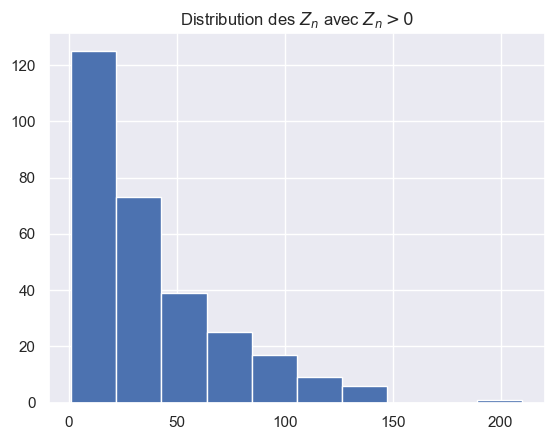

In [91]:
plt.title("Distribution des $Z_n$ avec $Z_n > 0$")
plt.hist(zn_sup_zero)

In [92]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 2.6538323137819364
lambda_estime = 2.6538323137819364


In [93]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [94]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

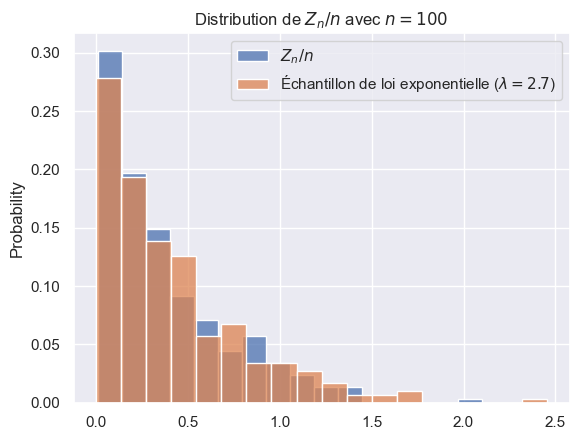

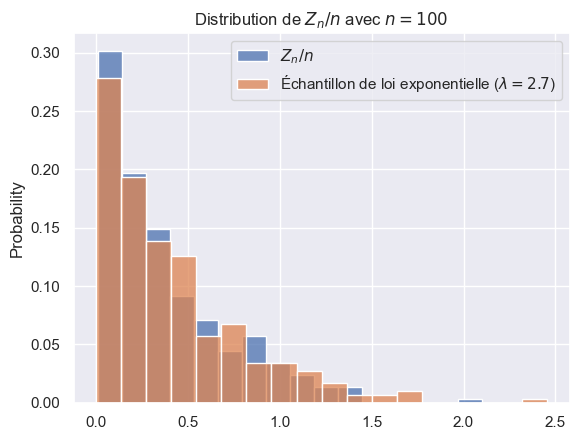

In [95]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability", label="$Z_n / n$")
sns.histplot(
    echantillon_expo,
    stat="probability",
    label=f"Échantillon de loi exponentielle ($\\lambda = {lambda_estime: 0.2}$)",
)

plt.legend()

In [96]:
p_value = test_loi_exponentielle(zn_sup_zero / nb_epoques)

statistique_ks = 0.033088011086562646
p_value = 0.8924378062988716
Les données suivent une loi exponentielle.
statistique_ks = 0.033088011086562646
p_value = 0.8924378062988716
Les données suivent une loi exponentielle.


## Expérimentations

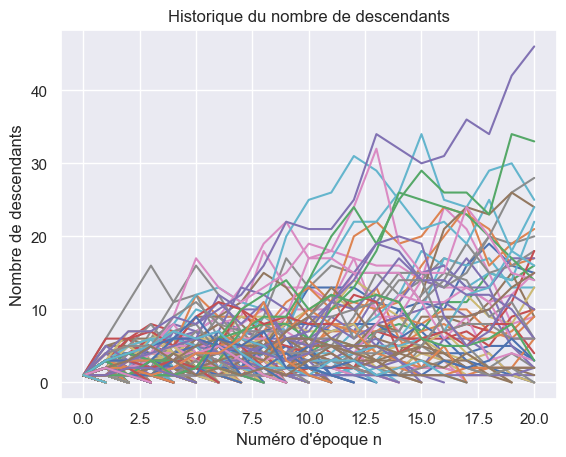

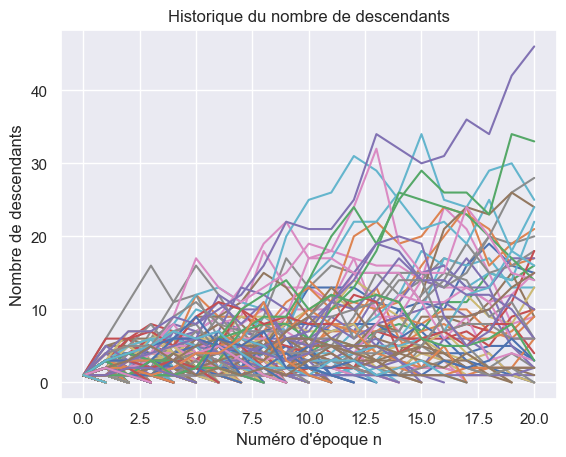

In [97]:
for _ in range(500):
    gp1.reset()
    gp1.simule(20)
    gp1.plot_historique_descendants()

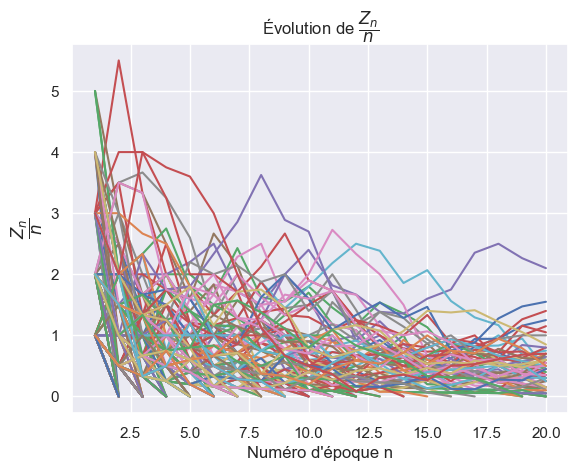

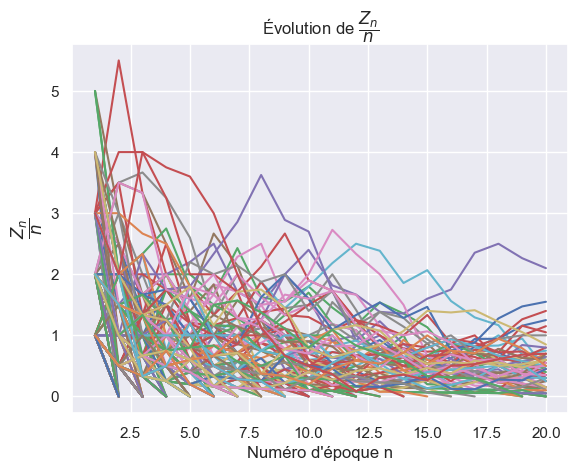

In [98]:
for _ in range(500):
    gp1.reset()
    gp1.simule(20)
    gp1.plot_zn_sur_n()

### Mise au propre Yaglom

In [126]:
nb_simulations = 1_000
nb_epoques = 300

In [127]:
simulations = gp1.lance_simulations(nb_simulations, nb_epoques)
simulations = np.array(simulations)

In [128]:
np.sum(simulations > 0)

11

In [129]:
zn_sup_zero = simulations[simulations > 0]

In [130]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 2.216252518468771


In [131]:
test_loi_exponentielle(zn_sup_zero / nb_epoques)

statistique_ks = 0.29497743338833504
p_value = 0.24170601398948843
Les données suivent une loi exponentielle.


0.24170601398948843

In [132]:
def processus_critique_survivant(gp: GaltonWatson, nb_simulations: int = 1_000, nb_epoques: int = 100) -> np.ndarray:
    simulations = gp.lance_simulations(nb_simulations, nb_epoques)
    simulations = np.array(simulations)

    zn_sup_zero = simulations[simulations > 0]

    return zn_sup_zero


In [146]:
liste = []

for i in range(10):
    nb_epoques = (i + 1) * 100
    res = processus_critique_survivant(gp1, nb_simulations=(i + 1) * 1_000, nb_epoques=nb_epoques)
    liste.append(res)

    lambda_estime = 1.0 / np.mean(liste[i] / nb_epoques)
    print(f"{lambda_estime = }")
    test_loi_exponentielle(liste[i] / nb_epoques)
    print()

lambda_estime = 1.6230838593327321
statistique_ks = 0.16053563423098496
p_value = 0.6842903294412719
Les données suivent une loi exponentielle.

lambda_estime = 1.8156424581005581
statistique_ks = 0.20522216040431102
p_value = 0.19447679679278407
Les données suivent une loi exponentielle.

lambda_estime = 1.8098606199292693
statistique_ks = 0.10655136483978633
p_value = 0.8626656466337737
Les données suivent une loi exponentielle.

lambda_estime = 2.6877470355731226
statistique_ks = 0.14870049857428302
p_value = 0.7948798942151691
Les données suivent une loi exponentielle.

lambda_estime = 2.233389168062535
statistique_ks = 0.1711744150421146
p_value = 0.6749203369672281
Les données suivent une loi exponentielle.

lambda_estime = 1.7627616599338962
statistique_ks = 0.25237642816549843
p_value = 0.21940181937120262
Les données suivent une loi exponentielle.

lambda_estime = 1.6330256618318288
statistique_ks = 0.22668956035200674
p_value = 0.16070879103307245
Les données suivent une loi 

In [167]:
from scipy.stats import rv_discrete


class SimulateurGaltonWatson:
    def __init__(self, loi: rv_discrete, nb_descendants: int = 1, nb_simulations: int = 1_000):
        self.nb_simulations = nb_simulations
        self.simulations: list[GaltonWatson] = [GaltonWatson(loi, nb_descendants) for _ in range(nb_simulations)]

    def simule(self, nb_epoques: int = 10) -> None:
        for i in range(self.nb_simulations):
            self.simulations[i].simule(nb_epoques)

    def get_n(self):
        return np.array([self.simulations[i].n for i in range(nb_simulations)])

    def nombre_survivants(self):
        return np.array([self.simulations[i].nb_descendants for i in range(nb_simulations)])

In [168]:
sim = SimulateurGaltonWatson(poisson_1)

In [169]:
sim.simule()

In [170]:
sim.simulations[0].n

10

(array([897.,  25.,  38.,  15.,   9.,   5.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.24, 0.48, 0.72, 0.96, 1.2 , 1.44, 1.68, 1.92, 2.16, 2.4 ]),
 <BarContainer object of 10 artists>)

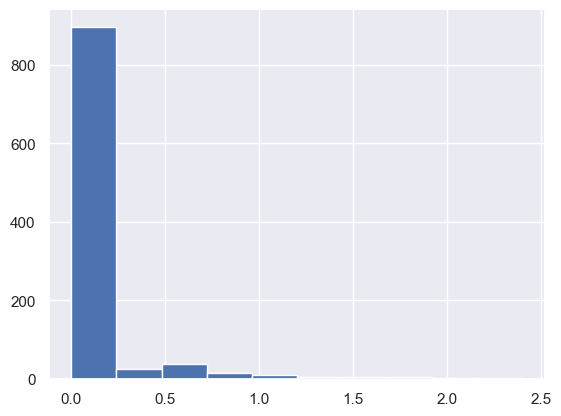

In [173]:
plt.hist(sim.nombre_survivants() / sim.get_n())

In [174]:
sim.nombre_survivants() / sim.get_n()

array([0.4, 0. , 0. , 0. , 0. , 0.8, 0. , 1.7, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.8, 0. , 0.5, 0. , 0. , 0. , 1. , 0. , 0.4, 0. , 0. ,
       0. , 0.1, 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 1.2, 0. , 0. , 0.1, 0. , 0.2, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1.8, 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0. , 1. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.5, 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.6, 0.5,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 1.1, 0.5, 0. , 0. , 1. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. ,
       0. , 0. , 0. , 1.5, 0. , 0.5, 0. , 0.2, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.